In [35]:
import cv2
import glob
import os
import numpy as np
import nd2reader
import matplotlib.pyplot as plt
from PIL import Image
from nd2reader import ND2Reader
from collections import defaultdict
import glob

In [27]:
paths = glob.glob(os.path.join("C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D", "**","*.tif"),recursive=True)
print(paths)

['C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\10x_0.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\10x_1.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\10x_2.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\10x_3.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\EPIRedTracker_0.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\EPIRedTracker_1.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\EPIRedTracker_2.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10A\\EPIRedTracker_3.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10DCIS.COM\\241014\\10x_1.tif', 'C:/Users/srboval1/OneDrive - Aalto University/Instru/images_mCherry/2D\\MCF10DCIS.COM\\241014\\10x_2.tif',

In [28]:
def color_channel(channel):
    channel_index = None  
    if channel == 'EPIRedTracker':
        channel_index = 0
    elif channel == 'EPIFITC':
        channel_index = 1
    elif channel == '10x':
        channel_index = 2
    
    return channel_index

List containing info on all images

In [ ]:
image_data_list = []

for count, i in enumerate(paths):
    try:
        image = cv2.imread(i) #reads the image into a NumPy array.
        basename = os.path.splitext(os.path.basename(i))[0].split('_')
        
        channel = color_channel(basename[0]) #setting channel number based on the name
        running_id = basename[1]

        partss = (i.split("/")[6]).split("\\")
        cell_line = partss[1]

        #info array for the specific image
        image_info = {
            'cell_line': cell_line,
            'running_id': running_id,  
            'channel_index': channel,
            'image': image  # c, store the image array
        }
        
        #appending the image info into a list
        image_data_list.append(image_info)
    
    except:
        IndexError
        print(f"Error on image: {i}")



In [41]:
#initialization of grouped_data and the 3-level nested dictionary
# innermost level is a list, for {'image': image} dictionaries
grouped_data = defaultdict(lambda: defaultdict(dict))

for image in image_data_list:
    cell_line = image['cell_line']
    running_id = image['running_id']
    channel = image['channel_index']
    image = image['image']

    
    # Append the item to the appropriate group
    grouped_data[cell_line][running_id][channel] = {'image': image}

# Convert to a regular dictionary for easier inspection (optional)
grouped_data = dict(grouped_data)

## ND2 files

In [144]:
import nd2reader 
from nd2reader import ND2Reader
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas

In [147]:
root = "D:/instru_projects/LIveDead_spheroids"
video = "241811_U_well_LD.nd2"

path = os.path.join(root,video)
day = video.split("_")[0]
nd2 = nd2reader.Nd2(path)
print(nd2)

<Deprecated ND2 D:/instru_projects/LIveDead_spheroids\241811_U_well_LD.nd2>
Created: 2024-11-18 09:41:30
Image size: 2304x2304 (HxW)
Frames: 1
Channels: FITC, Red, BF
Fields of View: 5
Z-Levels: 0


## Extracting images from videos

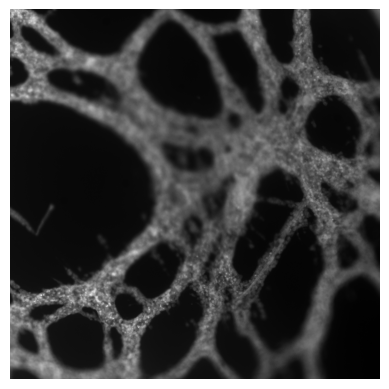

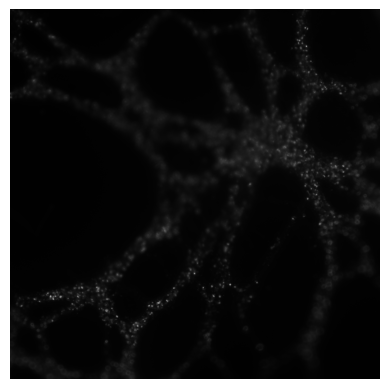

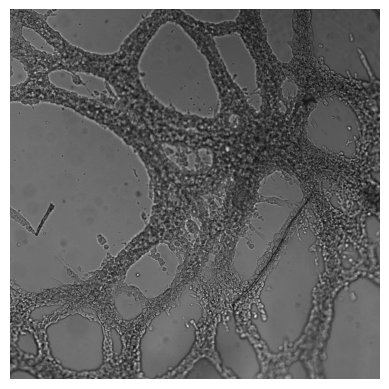

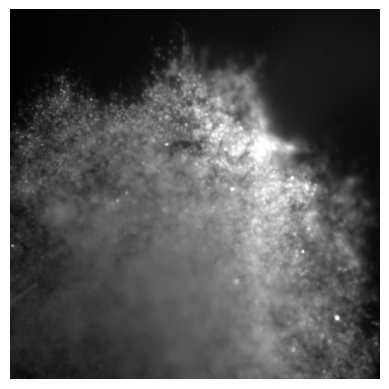

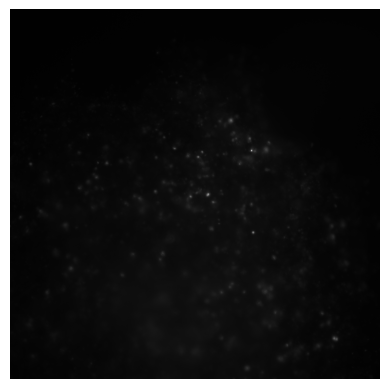

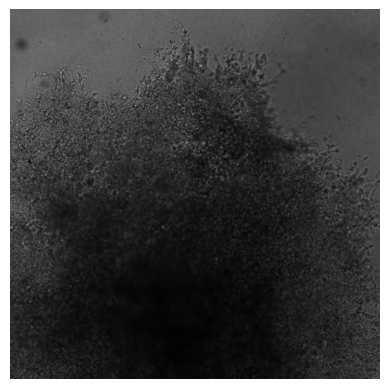

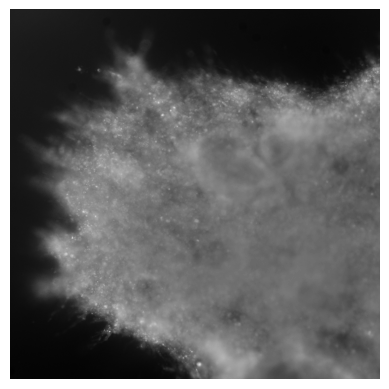

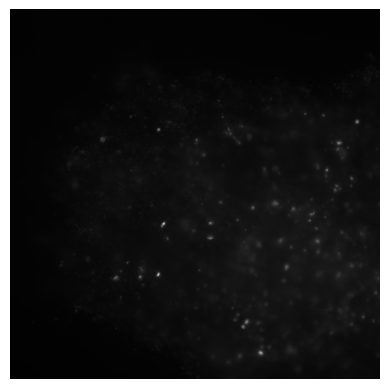

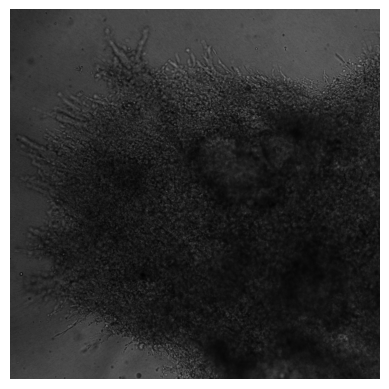

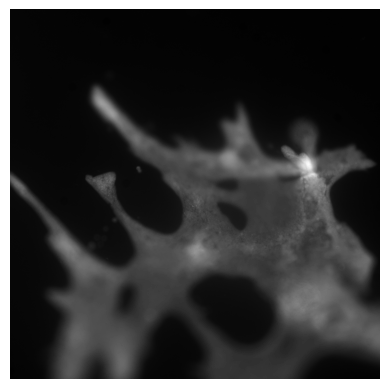

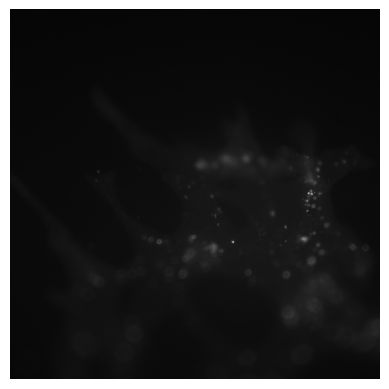

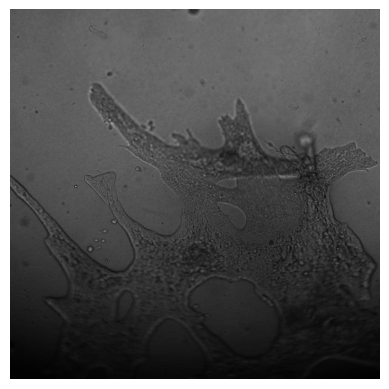

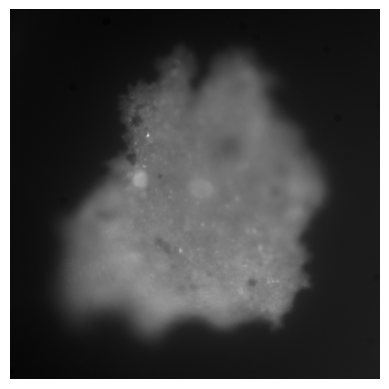

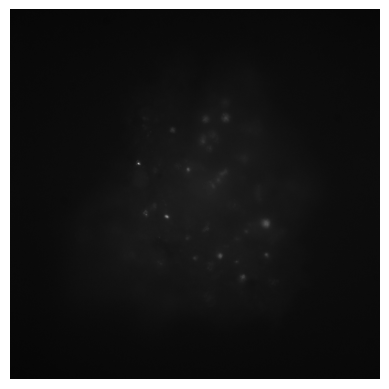

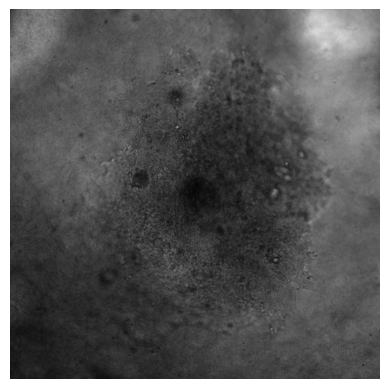

In [148]:
# Initialize the dictionary to store images and metadata
dict = {}

saving = path.replace(".nd2", "_images")
if not os.path.exists(saving):
    os.makedirs(saving)

path = os.path.join(root, video)

with ND2Reader(path) as images:
    images.iter_axes = 'v', 'c'  # Iterate over 'v' (field of view) and 'c' (channel)

    for image in images:
        field_of_view = image.metadata['coords']['v']
        channel_no = image.metadata['coords']['c']
        channel_name = image.metadata['channels'][channel_no]
        image_array = np.array(image)

        # Ensure the FOV (field of view) key exists in the dictionary
        if field_of_view not in dict:
            dict[field_of_view] = {}  # Initialize a dictionary for this FOV

        # Initialize the channel number key inside the FOV if it doesn't exist
        if channel_no not in dict[field_of_view]:
            dict[field_of_view][channel_no] = []  # Initialize a list for this channel number

        # Append the image and metadata under the corresponding FOV and channel number
        dict[field_of_view][channel_no].append({
            'image': image_array,
            'channel_name': channel_name,
            'location': field_of_view,
        })

        # Optionally display the image
        im = Image.fromarray(image_array)
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        plt.show()

        # Save the image
        im.save(f"{saving}/img_{field_of_view}_{channel_name}_{channel_no}.tif")


In [121]:
for i,j in dict.items():
    print(i)
    for k,l in j.items():
        print(type(l[0]['image']))

0
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
4
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Field of View: 0
Channel no.: 0
Channel no.: 1
Channel no.: 2


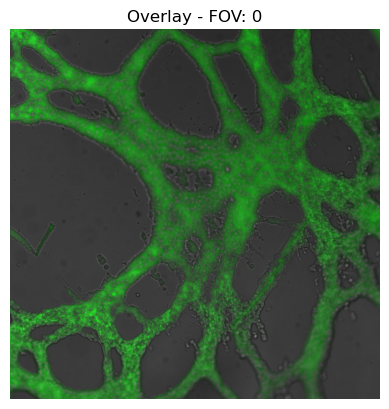

Field of View: 1
Channel no.: 0
Channel no.: 1
Channel no.: 2


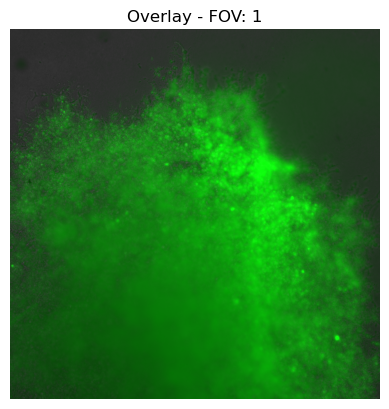

Field of View: 2
Channel no.: 0
Channel no.: 1
Channel no.: 2


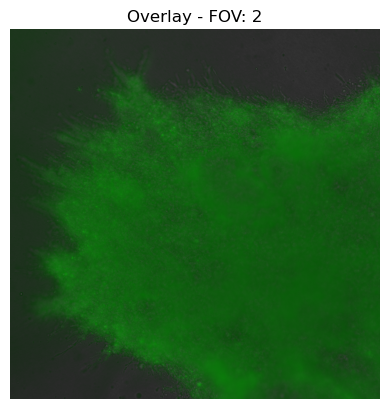

Field of View: 3
Channel no.: 0
Channel no.: 1
Channel no.: 2


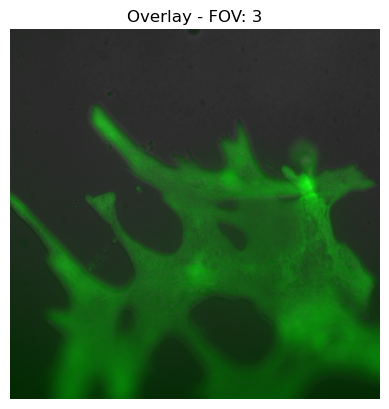

Field of View: 4
Channel no.: 0
Channel no.: 1
Channel no.: 2


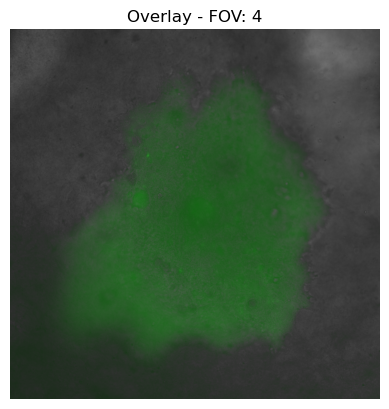

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Loop through each FOV (Field of View)
for field_of_view, channels in dict.items():
    print(f"Field of View: {field_of_view}")
    overlay_image = None

    max_int = 0
    # Find the maximum intensity value for normalization across all channels in the current FOV
    for channel_no, image in channels.items():
        max_int = max(max_int, np.max(image[0]['image']))
        print(f"Channel no.: {channel_no}")

    # Loop through each channel for the current FOV
    for channel_no, image in channels.items():  # returns a list of dictionaries
        # Extract the image and metadata
        image_array = image[0]['image']
        location = image[0]['location']
        channel_name = image[0]['channel_name']
        
        # Normalize the image to 0-255 range for visualization
        normalized_array = (image_array.astype('float32') / max_int) * 255
        normalized_array = np.clip(normalized_array, 0, 255).astype(np.uint8)  # Convert to uint8 for display

        # Initialize the overlay image if it's the first channel
        if overlay_image is None:
            overlay_image = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)
        
        # Assign the fluorescence channels to the appropriate color channels (Red, Green, Blue)
        if channel_name == 'Red':  # Assuming 'Red' is a fluorescence channel
            overlay_image[..., 0] = normalized_array  # Red channel
        elif channel_name == 'FITC':  # Example: Green fluorescence (e.g., FITC)
            overlay_image[..., 1] = normalized_array  # Green channel
        elif channel_name == 'BF':  # Brightfield channel
            # Normalize and apply the Brightfield (BF) image as grayscale
            bf_normalized = (image_array.astype('float32') / max_int) * 255  # Scale to full intensity range
            bf_normalized = np.clip(bf_normalized, 0, 255).astype(np.uint8)  # Ensure it's within 0-255
            
            bf_scaled = (bf_normalized * 0.5).astype(np.uint8)  # Decrease BF intensity by 50%

            # Apply the same intensity across all three channels to keep the BF as grayscale
            # We blend the BF with the existing image by taking the maximum intensity value
            overlay_image[..., 0] = np.maximum(overlay_image[..., 0], bf_scaled)  # Blend BF with red channel
            overlay_image[..., 1] = np.maximum(overlay_image[..., 1], bf_scaled)  # Blend BF with green channel
            overlay_image[..., 2] = np.maximum(overlay_image[..., 2], bf_scaled)  # Blend BF with blue channel

    # Display the overlay image
    plt.imshow(overlay_image)
    plt.axis('off')  # Hide axes for visualization
    plt.title(f"Overlay - FOV: {field_of_view}")
    plt.show()
    imageio.imwrite(f"{saving}/overlay_fov{field_of_view}.tif", overlay_image)



[[50795 50795 48148 ... 30899 31168 31168]
 [50795 50795 48148 ... 30899 31168 31168]
 [47164 47164 45329 ... 30968 30892 30892]
 ...
 [18720 18720 18299 ...  7427  7126  7126]
 [18792 18792 17719 ...  7374  7215  7215]
 [18792 18792 17719 ...  7374  7215  7215]]
D:/instru_projects/LIveDead_spheroids/241811_U_well_LD_images\img_0_FITC_0.tif



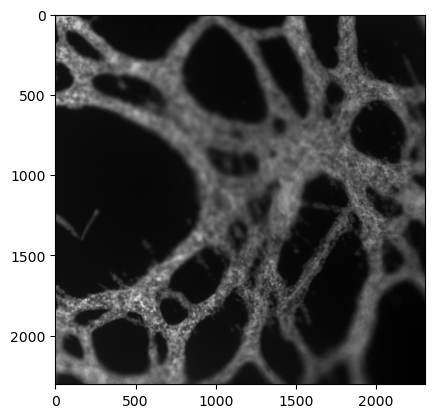

In [61]:
from skimage.io import imread

paths = glob.glob(os.path.join("D:/instru_projects/LIveDead_spheroids/241811_U_well_LD_images",'*.tif'),recursive=True)
for i in paths:
    image = imread(i)
    plt.imshow(image, cmap='gray')  # Display the image
    print(image)
    print(i)
    print("")
    break
    


In [145]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
from PIL import Image

with ND2Reader(path) as imagess:
    # Print sizes and metadata
    print(imagess.sizes)  # This will tell you the size of your data (FOV, channels, frames, etc.)
    print(imagess.metadata)  # This gives overall metadata about the image

    # Loop through the channels (assuming 'channels' is in the metadata)
    for c in range(len(imagess.metadata['channels'])):  # Loop over channels (0 to 2)
        
        # Loop through each field of view
        for v in range(imagess.metadata['total_images_per_channel']):  # Loop over fields of view (0 to 4)
            
            # Extract the image for the current channel (c) and field of view (v)
            # Assuming the ND2Reader uses frame indices (field of view, channel)
            try:
                image_data = imagess[v, c]  # Access image using (v, c)
                
                # Check the metadata for the image if available
                print(f"Metadata for image: Field of View {v}, Channel {c}: {image_data.metadata}")
                
                # Now you can process or display the image
                im = Image.fromarray(image_data)  # Convert to Image (PIL)
                plt.figure(figsize=(6, 6))
                plt.imshow(im, cmap='gray')
                plt.title(f"Channel: {c}, Field of View: {v}")
                plt.axis('off')
                plt.show()
                
            except Exception as e:
                print(f"Error accessing image for FOV {v}, Channel {c}: {e}")


{'x': 2304, 'y': 2304, 'c': 3, 't': 1, 'v': 5}
{'height': 2304, 'width': 2304, 'date': datetime.datetime(2024, 11, 18, 9, 41, 30), 'fields_of_view': range(0, 5), 'frames': [0], 'z_levels': [], 'z_coordinates': [3765.38, 3512.88, 3247.26, 3869.04, 3642.26], 'total_images_per_channel': 5, 'channels': ['FITC', 'Red', 'BF'], 'pixel_microns': 0.660535171355723, 'num_frames': 1, 'experiment': {'description': 'ND Acquisition', 'loops': []}, 'events': []}
Error accessing image for FOV 0, Channel 0: 
Error accessing image for FOV 1, Channel 0: 
Error accessing image for FOV 2, Channel 0: 
Error accessing image for FOV 3, Channel 0: Keys out of range
Error accessing image for FOV 4, Channel 0: Keys out of range
Error accessing image for FOV 0, Channel 1: 
Error accessing image for FOV 1, Channel 1: 
Error accessing image for FOV 2, Channel 1: 
Error accessing image for FOV 3, Channel 1: Keys out of range
Error accessing image for FOV 4, Channel 1: Keys out of range
Error accessing image for FOV 

In [ ]:
fig, axs = plt.subplots(3, len(unique_materials), figsize=(17, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.25)

for image in nd2.select(channels="Red", fields_of_view=(2)):
    im = Image.fromarray(image)
    im.show() 

In [ ]:
for image in nd2:


AttributeError: 

Channels: ['FITC', 'Red', 'BF']
Meta: {'height': 2304, 'width': 2304, 'date': datetime.datetime(2024, 11, 18, 9, 41, 30), 'fields_of_view': range(0, 5), 'frames': [0], 'z_levels': [], 'z_coordinates': [3765.38, 3512.88, 3247.26, 3869.04, 3642.26], 'total_images_per_channel': 5, 'channels': ['FITC', 'Red', 'BF'], 'pixel_microns': 0.660535171355723, 'num_frames': 1, 'experiment': {'description': 'ND Acquisition', 'loops': []}, 'events': []}
FOV: 5

0
1
2
3
4


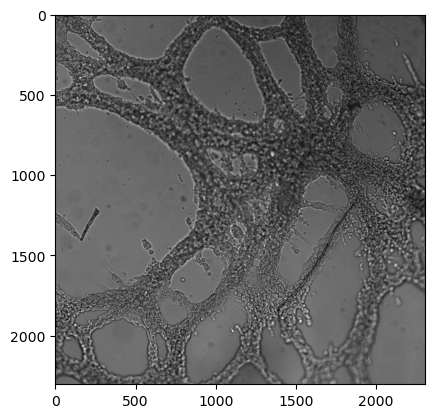

In [89]:
root = "D:/instru_projects/LIveDead_spheroids"
video = "241811_U_well_LD.nd2"

path = os.path.join(root,video)

day = video.split("_")[0]

def metadata(path):
    with ND2Reader(path) as images:
        n_fields = images.metadata['fields_of_view'].stop
        microns = images.metadata['pixel_microns']
        n_frames = images.metadata['num_frames']
        z_level = (np.max(images.metadata['z_coordinates'])-np.min(images.metadata['z_coordinates']))
        n_levels = len(images.metadata['z_levels'])+1
        z_step = z_level/n_levels
        channels = images.metadata['channels']
        n_channels = len(channels)
        vis_level = int(n_levels/2)
        metas = images.metadata
        return channels, n_fields, metas

channels = metadata(path)[0]
fov = metadata(path)[1]
meta = metadata(path)[2]

print(f"Channels: {channels}")
print(f"Meta: {meta}")
print(f"FOV: {fov}")
print("")

# Creates an instance of Nd2Reader object - collection of images
nd2 = nd2reader.Nd2(path)

#for image in nd2:
    
with ND2Reader(path) as images:
    for i in range(5):
        img = images.get_frame_2D(c=0,v=i)
        print(i)
        im = Image.fromarray(image)
        plt.imshow(im, cmap='gray')

        




# Opens the .nd2 file via ND2Reader(path)

In [ ]:
# Creates an instance of Nd2Reader object - collection of images
nd2 = nd2reader.Nd2(path)
for fov_idx in range(fov):
    for i,channel_idx in enumerate(channels):    
        for image in nd2.select(channels = channel_idx, fields_of_view=fov_idx):
            print(f"FOV: {fov_idx}, Channel:{channel_idx}, image: {image.metadata}")
            #im = Image.fromarray(image)
            #plt.imshow(im, cmap='gray')  # Use 'gray' for grayscale images, or customize the colormap
            break

In [ ]:
root = "D:\instru_projects\LIveDead_spheroids"
video = "241811_U_well_LD.nd2"

path = os.path.join(root,video)


day = video.split("_")[0]


with ND2Reader(path) as images:

    for v in v_list:
        for t in t_list:
            for z in z_list:

                img = images.get_frame_2D(c=0, t=t, z=z, x=0, y=0, v=v)
                im = Image.fromarray(img)
                #img_max = (img_max/np.max(img_max)*2**16-1).astype("uint16")
                im.save('./dataStore/img_store/img_{}_{}_{}_{}.tif'.format(day,v,t,z))